# INFO 212: Data Science Programming 1
___

### Week 5: Plot and Visualization
___

### Mon., April 30, 2018
---

**Question:**
- What visualization capabilities does Python provide to explore data? 

**Objectives:**
- Plot with Pandas
- Change figure size.
- Change colors, markers, and line styles
- Add ticks, labels, and legends
- Save plots to files
- Plot with seaborn

In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [3]:
%matplotlib inline

Making informative visualizations (sometimes called plots) is one of the most important
tasks in data analysis. It may be a part of the exploratory process—for example,
to help identify outliers or needed data transformations, or as a way of generating
ideas for models. For others, building an interactive visualization for the web may be
the end goal. Python has many add-on libraries for making static or dynamic visualizations.

In [3]:
import re

In [4]:
# Read in the US-states.txt and make a list of longitudinal and latitudinal data
segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("datasets/US-states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/US-states.txt'

In [16]:
segments[:5]

[((-88.1955, 35.0041), (-85.6068, 34.9918)),
 ((-85.6068, 34.9918), (-85.1756, 32.8404)),
 ((-85.1756, 32.8404), (-84.8927, 32.2593)),
 ((-84.8927, 32.2593), (-85.0342, 32.1535)),
 ((-85.0342, 32.1535), (-85.1358, 31.7947))]

```
plt.figure(figsize = (12, 8))
for ((lon1, lat1), (lon2, lat2)) in segments:
    plt.plot([lon1, lon2], [lat1, lat2], color = '0.8')
plt.plot(-75.165222, 39.952583, 'bo', label = 'Philadelphia')
plt.legend(loc = 'best')
```

## Plot with Pandas

The pandas library is the core library for Python data analysis: the "killer feature" that makes the entire ecosystem stick together. However, it can do more than load and transform your data: it can visualize it too! Indeed, the easy-to-use and expressive pandas plotting API is a big part of pandas popularity.

```
reviews = pd.read_csv("datasets/winemag-data-130k-v2.csv", index_col=0)
reviews.head(3)
```

In [5]:
reviews = pd.read_csv("datasets/winemag-data-130k-v2.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


## Univariate Plot
How to visualize information about a single variable?

## Bar charts and categorical data
Bar charts are arguably the simplest data visualization. They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Americans, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number):

```
reviews['province'].value_counts().head(10).plot.bar()```

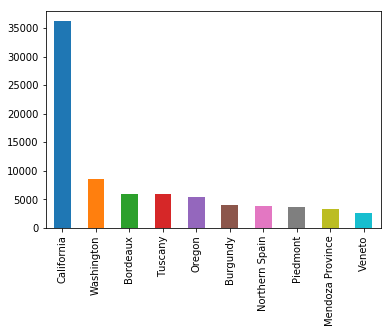

In [6]:
reviews['province'].value_counts().head(10).plot.bar()

what percent of the total is Californian vintage? 

```
(reviews['province'].value_counts() / len(reviews)).head(10).plot.bar()```

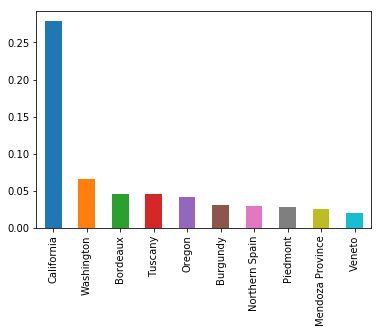

In [8]:
(reviews['province'].value_counts() / len(reviews)).head(10).plot.bar()

How are the review points distributed?

```
reviews['points'].value_counts().sort_index().plot.bar()```

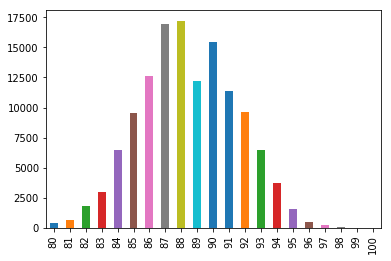

In [7]:
reviews['points'].value_counts().sort_index().plot.bar()

## Line charts
For the points values as real number, line charts should be the first choice for visualizing the distribution.

```
reviews['points'].value_counts().sort_index().plot.line()```

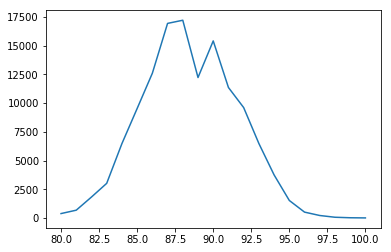

In [9]:
reviews['points'].value_counts().sort_index().plot.line()

## Area charts
Area charts are just line charts, but with the bottom shaded in. That's it!

```
reviews['points'].value_counts().sort_index().plot.area()```

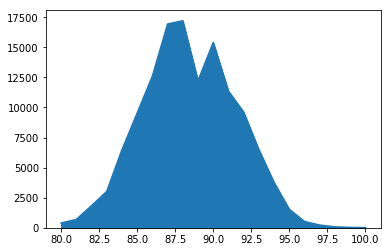

In [10]:
reviews['points'].value_counts().sort_index().plot.area()

## Histogram
A histogram looks, trivially, like a bar plot. And it basically is! In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars.

```
reviews[reviews['price'] < 200]['price'].plot.hist()```

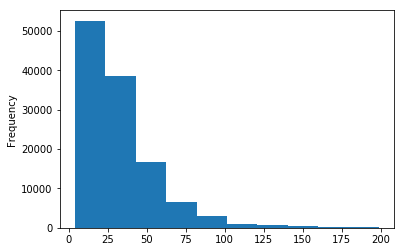

In [11]:
reviews[reviews['price'] < 200]['price'].plot.hist()

## Bivariate Plot
Does the increase in price cause the increase in points?

```
reviews[reviews['price'] < 1000].plot.scatter(x = 'points', y = 'price')```

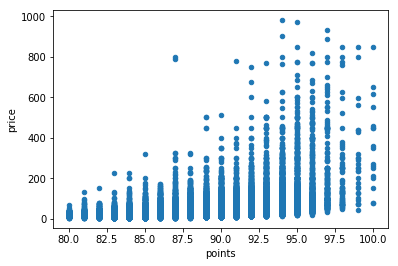

In [12]:
reviews[reviews['price'] < 1000].plot.scatter(x = 'points', y = 'price')

## Colors, Markers, and Line Styles
How to change the line style and color of plot?

```
ax = reviews[reviews['price'] < 1000].plot.scatter(x = 'points', y = 'price', \
                                                  figsize = (12, 6), \
                                                  color = 'mediumvioletred', \
                                                  linestyle = '--', \
                                                  fontsize = 16)
ax.set_title('Price vs. Points')```

How to set markers on plotted lines for data points?

```
from numpy.random import randn
plt.plot(randn(30).cumsum(), color = 'r', linestyle = '--', marker = 'o')```

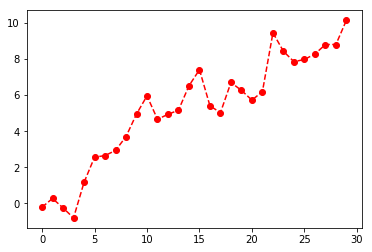

In [13]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), color = 'r', linestyle = '--', marker = 'o')

### Ticks and Legends
How to set ticks and legends for plots?

```
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())```

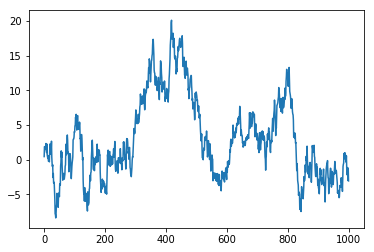

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

```
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')```

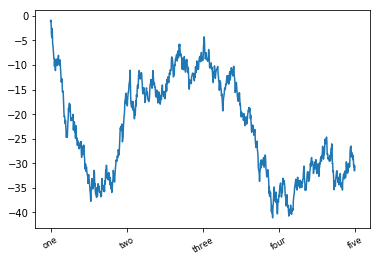

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

```
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
blue_lines = ax.plot(np.random.randn(1000).cumsum(), label ="Random Numbers")
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_ylabel("Random Number")
ax.set_xlabel('Stages')
ax.legend(loc='best')```

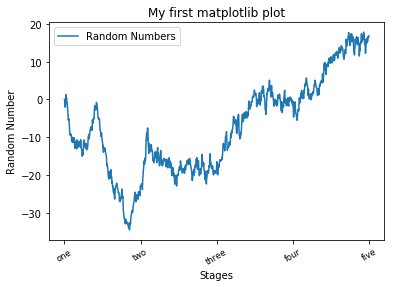

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
blue_lines = ax.plot(np.random.randn(1000).cumsum(), label ="Random Numbers")
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_ylabel("Random Number")
ax.set_xlabel('Stages')
ax.legend(loc='best')

How to add legends to a plot?

```
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')```

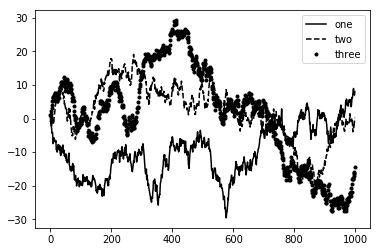

In [16]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### How to Save Plots to File?

```
plt.savefig('figpath.svg')```

```
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')```

```
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()```

## Plotting with seaborn
seaborn is a statistical graphics library. Seaborn simplifies creating many common visualization types. With data that requires aggregation or summarization before making a plot, using the seaborn package can make things much simpler.

```
titanic = pd.read_csv("datasets/titanic/train.csv")
titanic.head()```

```
import seaborn as sns```

How are the chances of survival related to Age and Pclass?

```
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();```